## 1. Problem Statement
- Customer Personality Analysis is the analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

## 2. Import data and necessary libaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import warnings as filterwarnings
from datetime import datetime
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import DBSCAN





In [40]:
#Ignore warnings
filterwarnings.filterwarnings('ignore')

In [41]:
data = pd.read_csv('marketing_campaign.csv',sep='\t' )
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [42]:
data_original = data.copy()

## 3. Basic EDA

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

- Missingness

In [44]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


- Need for scaling
- Presence of outliers

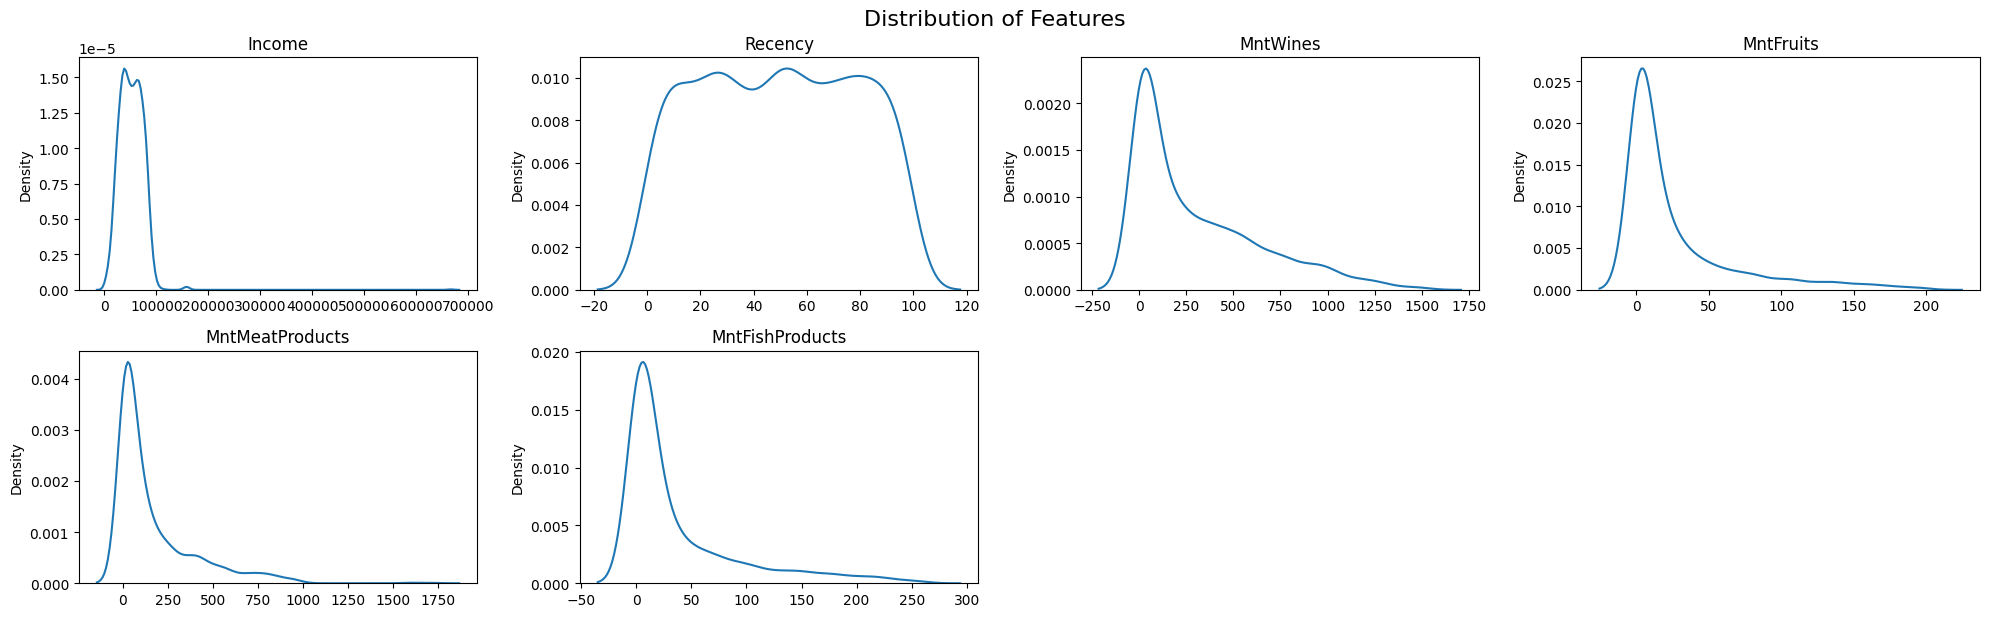

In [45]:
#Distribution
columns = ['Income','Recency', 'MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts']

# Create subplots
fig, axes = plt.subplots(4, 4, figsize=(20, 12))
fig.suptitle('Distribution of Features', fontsize=16)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot each feature
for i, column in enumerate(columns):
    sns.kdeplot(data=data, x=column, ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('')

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- Income and spending features are highly right-skewed, indicating a few high-value and high spenders customers.
- Recency is bimodal, suggesting distinct engagement levels among customers.

## 4. Data Preprocessing

#### 4.1 Handling Missingness

In [46]:
#Explore the missingness
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

<Axes: >

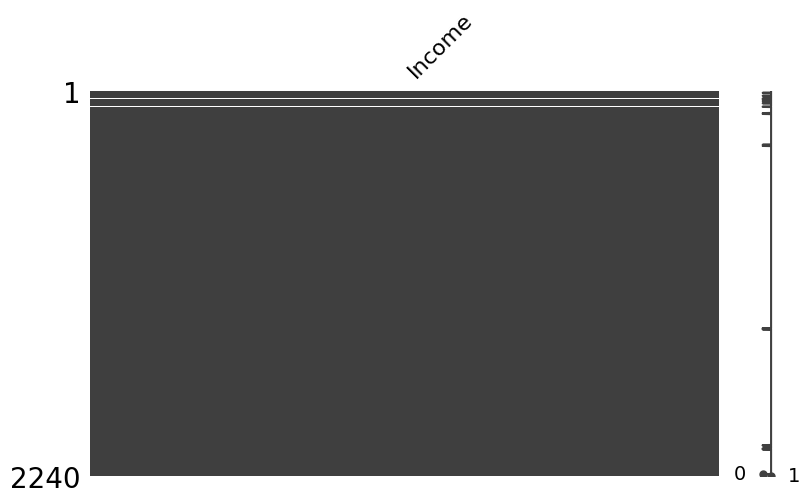

In [50]:
#Explore the missingness
msno.matrix(data[['Income']], figsize=(9,5))

- Since the type of missingness in the 'Income' column is missing not at random (MNAR) - KNN imputer is used to handle the missingness.

In [51]:
imputer = KNNImputer()
data['Income'] = imputer.fit_transform(data[['Income']])

#### 4.2 Feature Engineering

In [52]:
# Convert Year_birth to Age
current_year = datetime.now().year
data['Age'] = current_year - data['Year_Birth']

In [53]:
# Convert Dt_Customer to days since enrollment
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')
data['Customer_Days'] = (datetime.now() - data['Dt_Customer']).dt.days

In [54]:
#Total children at home
data['Total_Children'] = data['Kidhome'] + data['Teenhome']

In [55]:
#Total money spent
mnt_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data['Total_Spent'] = data[mnt_columns].sum(axis=1)

In [56]:
# Drop unnecessary columns
data.drop(['ID', 'Year_Birth', 'Dt_Customer'], axis=1, inplace=True)

In [57]:
#Drop mnt columns to avoid multicollinearity
data.drop(mnt_columns, axis=1, inplace=True)

In [58]:
#Drop kidhome and teenhome
data.drop(['Kidhome', 'Teenhome'], axis=1, inplace=True)

In [59]:
#Drop categorical columns because Euclidean distance is not meaningful for discrete variables
cat_columns = data.select_dtypes('object').columns
data.drop(cat_columns, axis=1, inplace=True)

#### 4.4 Feature Scaling

- A robust scaler is used since most of the features have a sweked distribution.

In [60]:
#Scale the data
scaler = RobustScaler()
data_scaled = scaler.fit_transform(data)
data_scaled_df = pd.DataFrame(data_scaled, columns=data.columns)

## 5. K-means Clustering

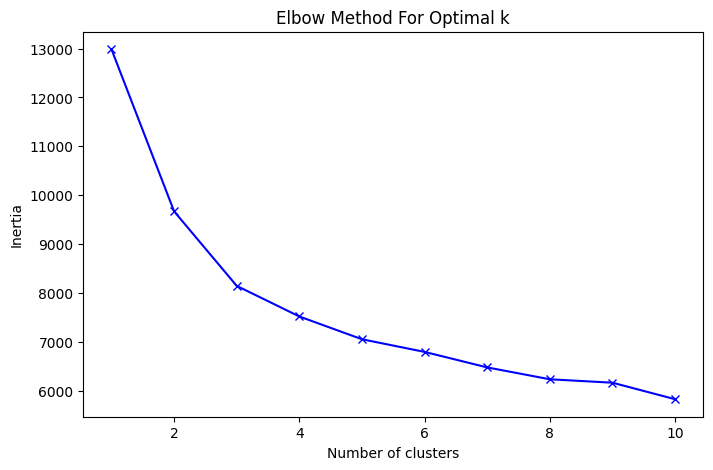

In [61]:
# Determine the optimal number of clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(init="k-means++", n_clusters=k, n_init=20, random_state=42)
    kmeans.fit(data_scaled_df)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


- Optimal number of clusters from the elbow method: 3

In [62]:
# Training the K-means Model
k_means = KMeans(n_clusters=3, random_state=42)
k_means.fit(data_scaled_df)

KMeans(n_clusters=3, random_state=42)

In [63]:
labels = k_means.labels_
labels

array([1, 0, 1, ..., 1, 1, 0])

In [64]:
# Create a new DataFrame with the cluster labels
data['Cluster'] = labels
data.head(5)

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,Total_Children,Total_Spent,Cluster
0,58138.0,58,3,8,10,4,7,0,0,0,...,0,0,3,11,1,67,4411,0,1617,1
1,46344.0,38,2,1,1,2,5,0,0,0,...,0,0,3,11,0,70,3861,2,27,0
2,71613.0,26,1,8,2,10,4,0,0,0,...,0,0,3,11,0,59,4060,0,776,1
3,26646.0,26,2,2,0,4,6,0,0,0,...,0,0,3,11,0,40,3887,1,53,0
4,58293.0,94,5,5,3,6,5,0,0,0,...,0,0,3,11,0,43,3909,1,422,2


In [65]:
data['Cluster'].value_counts()

Cluster
0    1046
1     735
2     459
Name: count, dtype: int64

### Analyzing and Visualizing the Clusters

In [70]:
data.columns

Index(['Income', 'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'Total_Children', 'Total_Spent', 'Cluster'],
      dtype='object')

<Axes: xlabel='Income', ylabel='Total_Spent'>

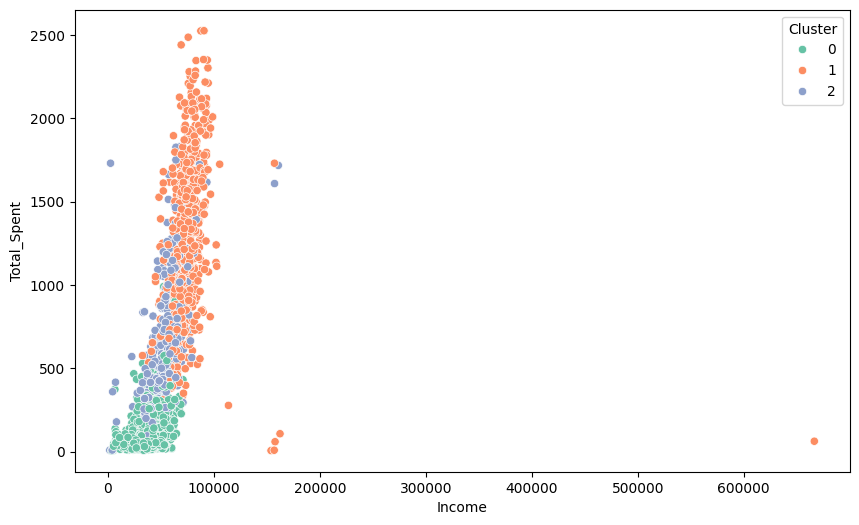

In [74]:
#Scatterplot of income and cluster, hue by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Income'], y=data['Total_Spent'], hue=data['Cluster'], data=data, palette='Set2')

- The clusters in the scatter plot are overlapping significantly, suggesting that the differentiation between them is not very distinct.

In [67]:
#Analyze the cluster profiles
cluster_means = data.groupby('Cluster').mean()
cluster_means


,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,Total_Children,Total_Spent
Cluster,,,,,,,,,,,,,,,,,,,,
0,35320.277502,49.133843,1.850860,2.181644,0.605163,3.332696,6.346080,0.068834,0.014340,0.000000,0.001912,0.001912,0.011472,3.0,11.0,0.080306,52.760038,4065.910134,1.193117,109.548757
1,74688.517698,49.206803,1.280272,5.355102,5.432653,8.419048,3.133333,0.081633,0.129252,0.213605,0.174150,0.029932,0.005442,3.0,11.0,0.244898,56.571429,4093.142857,0.333333,1257.291156
2,54886.214067,48.897603,5.078431,6.387800,2.912854,7.180828,6.466231,0.067538,0.124183,0.013072,0.030501,0.013072,0.010893,3.0,11.0,0.152505,58.535948,4196.387800,1.385621,693.444444


- Cluster 1 has the highest average income and spending, indicating they are the most profitable.
-  Cluster 0 has the lowest income and spending, showing minimal response to campaigns.
- Cluster 2 tends to make the most purchases through both deals and web (5.08 and 6.39), while Cluster 1 relies heavily on catalog purchases (5.43).
- In terms of store purchases: Highest in Class 1 with Class 0 being significantly lower than the other 2 classes.

In [68]:
silhouette = silhouette_score(data_scaled_df, labels)
silhouette

0.2588600178798616

In [69]:
db_score = davies_bouldin_score(data_scaled_df, labels)
db_score

1.507562961040355

## Alternative Clustering Algorithms

### Hierarchical Clustering

In [75]:
#Drop clusters from k means
data.drop('Cluster', axis=1, inplace=True)

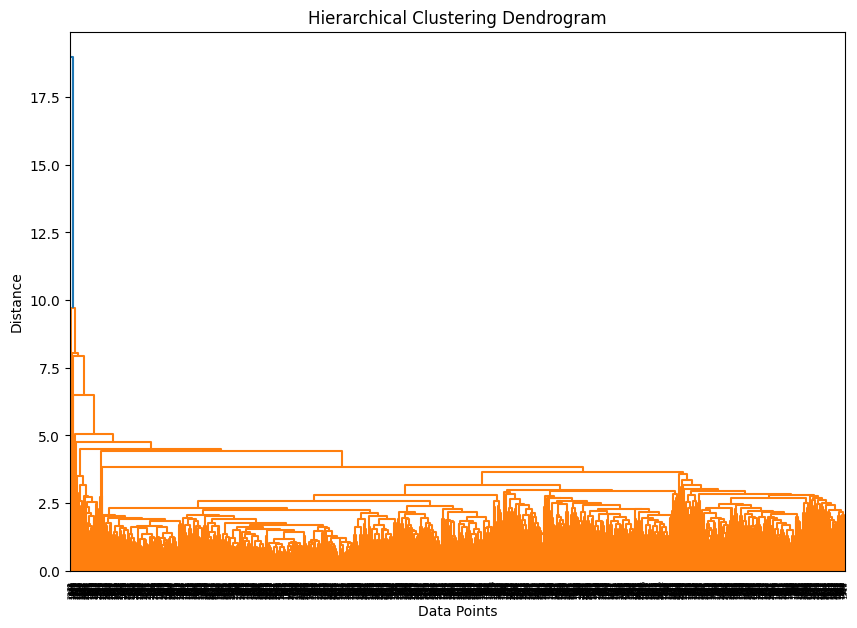

In [76]:
import scipy.cluster.hierarchy as sch

#Create dendrogram to visualize the hierarchical structure
linked = sch.linkage(data_scaled_df, method='average')

#plot the dendogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(linked)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [77]:
# Assign cluster labels based on the threshold
clusters = fcluster(linked, t=9.0, criterion='distance')


In [78]:
 #Check the number of clusters formed
print(f"Number of clusters formed: {len(np.unique(clusters))}")

Number of clusters formed: 3


In [79]:
# Add the labels to your dataset
data['Hierarchical_Cluster'] = clusters
data.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,Total_Children,Total_Spent,Hierarchical_Cluster
0,58138.0,58,3,8,10,4,7,0,0,0,...,0,0,3,11,1,67,4411,0,1617,2
1,46344.0,38,2,1,1,2,5,0,0,0,...,0,0,3,11,0,70,3861,2,27,2
2,71613.0,26,1,8,2,10,4,0,0,0,...,0,0,3,11,0,59,4060,0,776,2
3,26646.0,26,2,2,0,4,6,0,0,0,...,0,0,3,11,0,40,3887,1,53,2
4,58293.0,94,5,5,3,6,5,0,0,0,...,0,0,3,11,0,43,3909,1,422,2


In [80]:
#Analyze the hierarchical cluster profiles
kcluster_means = data.groupby('Hierarchical_Cluster').mean()
kcluster_means


,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,Total_Children,Total_Spent
Hierarchical_Cluster,,,,,,,,,,,,,,,,,,,,
1,106831.000000,53.666667,15.000000,0.000000,26.000000,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,46.000000,4199.000000,0.666667,1685.00000
2,51899.232573,49.114937,2.307245,4.090787,2.631485,5.798748,5.322898,0.072898,0.074687,0.072898,0.064401,0.013417,0.009392,3.0,11.0,0.149374,55.210197,4101.434258,0.950805,604.59347
3,666666.000000,23.000000,4.000000,3.000000,1.000000,3.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,47.000000,4140.000000,1.000000,62.00000


<Axes: xlabel='Income', ylabel='Total_Spent'>

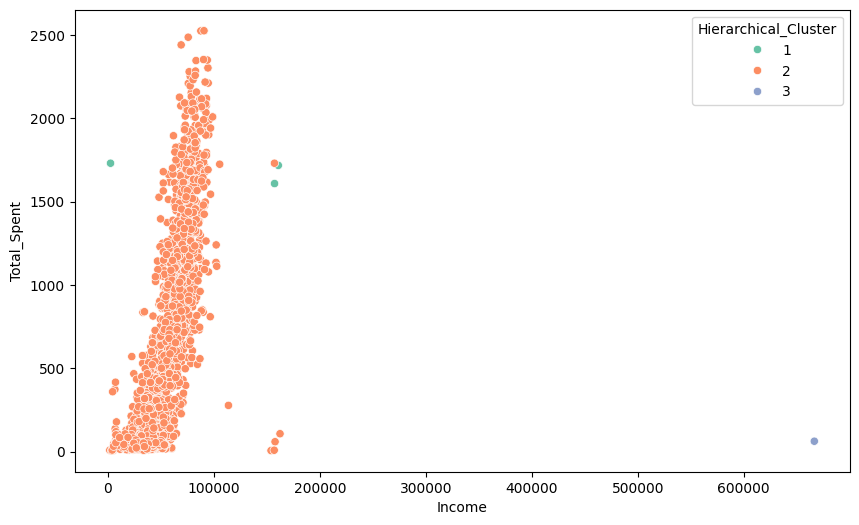

In [81]:
#Scatterplot of income and cluster, hue by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Income'], y=data['Total_Spent'], hue=data['Hierarchical_Cluster'], data=data, palette='Set2')

In [82]:
#Check the number of clusters
data['Hierarchical_Cluster'].value_counts()

Hierarchical_Cluster
2    2236
1       3
3       1
Name: count, dtype: int64

In [83]:
# 5. Evaluate hierarchical clustering
silhouette_hc = silhouette_score(data_scaled_df, clusters)
db_score_hc = davies_bouldin_score(data_scaled_df, clusters)

print(f'{silhouette_hc:.4f}')
print(f'{db_score_hc:.4f}')

0.6715
0.3963
